In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

df = pd.read_csv("C:\\Users\\harvi\\Desktop\\richardson-weather-analysis\\data\\richardson weather from 1-2020 to 12-2024.csv", parse_dates=['DATE'])

In [2]:
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

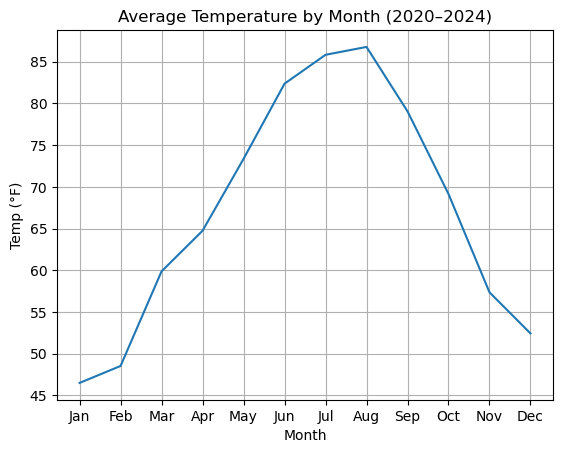

In [4]:
df['TAVG'] = (df['TMAX'] + df['TMIN']) / 2

monthly_avg = df.groupby('month').agg({
    'TAVG': 'mean',
    'PRCP': 'mean'
}).reset_index()
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

sns.lineplot(data=monthly_avg, x='month_name', y='TAVG')
plt.title('Average Temperature by Month (Jan 2020– Dec 2024)')
plt.ylabel('Temp (°F)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


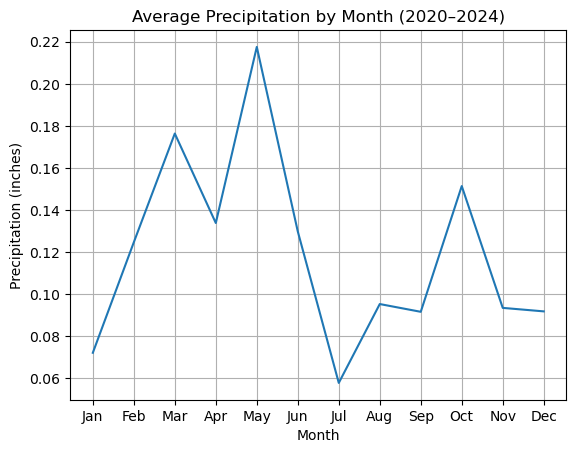

In [5]:
sns.lineplot(data=monthly_avg, x='month_name', y='PRCP')
plt.title('Average Precipitation by Month (2020–2024)')
plt.ylabel('Precipitation (inches)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

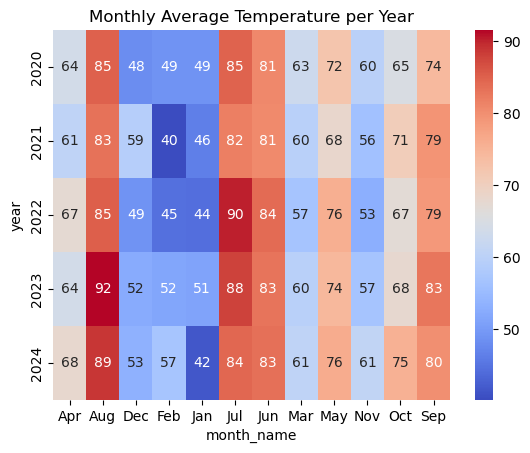

In [6]:
pivot_temp = df.pivot_table(index='year', columns='month_name', values='TAVG', aggfunc='mean')
sns.heatmap(pivot_temp, cmap='coolwarm', annot=True)
plt.title("Monthly Average Temperature per Year")
plt.show()

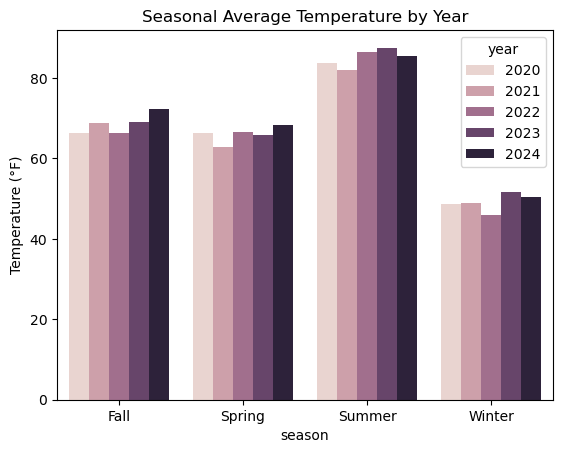

In [7]:
seasonal = df.groupby(['year', 'season']).agg({
    'TAVG': 'mean',
    'PRCP': 'sum'
}).reset_index()

sns.barplot(data=seasonal, x='season', y='TAVG', hue='year')
plt.title('Seasonal Average Temperature by Year')
plt.ylabel('Temperature (°F)')
plt.show()